# Analyzing NYTbd Sample 2
<br>
This notebook is looking at the NYTbd Sample 2 content analyzed by ACCENT and PETRARCH2 to identify current limitations with PETRARCH2 and to try and devise solutions. 

In [1]:
# Setup Environment
from nltk.parse.corenlp import CoreNLPServer
from nltk.parse.corenlp import CoreNLPDependencyParser
from nltk.parse import CoreNLPParser

import pandas as pd

import pprint
import nltk

from nltk.tree import *
from IPython.display import display

import io, os, sys, types

from IPython import get_ipython
from nbformat import read
from IPython.core.interactiveshell import InteractiveShell

#### Link to Java Server for Standford CoreNLP
<br>
java -mx4g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer -annotators "tokenize,ssplit,pos,lemma,parse,sentiment" -port 9000 -timeout 100000

In [2]:
# Connect to Server
parser = CoreNLPParser('http://localhost:9000')
depr = CoreNLPDependencyParser('http://localhost:9000')

#### Write Some Functions for Parsing Text

In [3]:
# Core Parser- save as df['parsed']
def core_parser(df, col):
    parse = []
    i = ""
    for i in range(len(df)):
        parse.append(i)
        parse[i] = next(parser.raw_parse(df[col].iloc[i]))
    return parse

# Dependency Parser- save as df['dep']
def dep_parser(df, col):
    dep = []
    i = ""
    for i in range(len(df)):
        dep.append(i)
        dep[i] = next(depr.raw_parse(df[col].iloc[i]))
    return dep

# For easy display of both parse trees, text, and code
def easy_read(corp, index_num):
    display(corp['parsed'].iloc[index_num])
    display(corp['dep'].iloc[index_num])
    display("Text = " + corp.iloc[index_num].loc['text'])
    display("Code = " + str(corp.iloc[index_num].loc['code']))

## Import Data

In [4]:
petrarch2 = pd.read_csv("/Volumes/PartTime/Jonathan Bonaguro - Spring 2020/NYTbd sample 2 14 18/combined_output_2-24_11-13-11.txt", sep='\t')
accent2 = pd.read_csv("/Volumes/PartTime/Jonathan Bonaguro - Spring 2020/NYTbd sample 2 14 18/ACCENT output NYTbd 14 18 sample 2.csv")
petrarch2.drop('Unnamed: 0', axis=1, inplace=True)

## Let's Start with Root Code 18
<br>
Subset PETRARCH and ACCENT on root code 18

In [96]:
petrarch2_root18 = petrarch2[petrarch2.root_code == 18]
accent2_root18 = accent2[accent2.root_code == 18]

In [97]:
# parse petrarch root code 18
%time petrarch2_root18['parsed'] = core_parser(petrarch2_root18, 'text')
petrarch2_root18['dep'] = dep_parser(petrarch2_root18, 'text')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


CPU times: user 230 ms, sys: 312 ms, total: 542 ms
Wall time: 13.8 s


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
# parse accent root code 18
%time accent2_root18['parsed'] = core_parser(accent2_root18, 'text')
accent2_root18['dep'] = dep_parser(accent2_root18, 'text')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


CPU times: user 390 ms, sys: 320 ms, total: 710 ms
Wall time: 2min 59s


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### Articles where PETRARCH and ACCENT ***did not*** find the same event and ***did*** find the same event

In [19]:
# Index on 'aid' and 'code' 
keys = list(['aid', 'code'])
accent2_root18_index = accent2_root18.set_index(keys).index
petrarch2_root18_index = petrarch2_root18.set_index(keys).index

# Produce df's of mutually exclusive events 
accent2_root18_only = accent2_root18[~accent2_root18_index.isin(petrarch2_root18_index)]
petrarch2_root18_only = petrarch2_root18[~petrarch2_root18_index.isin(accent2_root18_index)]

# Produce df's of same article, same coding
accent2_root18_same_code = accent2_root18[accent2_root18_index.isin(petrarch2_root18_index)]
petrarch2_root18_same_code = petrarch2_root18[petrarch2_root18_index.isin(accent2_root18_index)]

# sort values on AID and reset index 
accent2_root18_only = accent2_root18_only.sort_values('aid').reset_index(drop = True)
petrarch2_root18_only = petrarch2_root18_only.sort_values('aid').reset_index(drop = True)

accent2_root18_same_code = accent2_root18_same_code.sort_values('aid').reset_index(drop = True)
petrarch2_root18_same_code = petrarch2_root18_same_code.sort_values('aid').reset_index(drop = True)

### Articles where PETRARCH and ACCENT found ***different*** events

In [20]:
## Index only on AID
new_key = list(['aid'])
accent2_root18_index1 = accent2_root18.set_index(new_key).index
petrarch2_root18_index1 = petrarch2_root18.set_index(new_key).index

## df of same articles coded by each event code
accent2_root18_sameAID = accent2_root18[accent2_root18_index1.isin(petrarch2_root18_index1)]
petrarch2_root18_sameAID = petrarch2_root18[petrarch2_root18_index1.isin(accent2_root18_index1)]

## sort on AID and reset index
accent2_root18_sameAID = accent2_root18_sameAID.sort_values('aid').reset_index(drop = True)
petrarch2_root18_sameAID = petrarch2_root18_sameAID.sort_values('aid').reset_index(drop = True)

## index dfs of same articles on AID and event code
accent2_root18_sameAID_index = accent2_root18_sameAID.set_index(keys).index
petrarch2_root18_sameAID_index = petrarch2_root18_sameAID.set_index(keys).index

## create df's of different codings in same event
accent2_root18_diffCODE = accent2_root18_sameAID[~accent2_root18_sameAID_index.isin(petrarch2_root18_sameAID_index)]
petrarch2_root18_diffCODE = petrarch2_root18_sameAID[~petrarch2_root18_sameAID_index.isin(accent2_root18_sameAID_index)]

In [21]:
# discard pile of events with same AID and SAME code
accent2_root18_discard = accent2_root18_sameAID[accent2_root18_sameAID_index.isin(petrarch2_root18_sameAID_index)]
petrarch2_root18_discard = petrarch2_root18_sameAID[petrarch2_root18_sameAID_index.isin(accent2_root18_sameAID_index)]

In [22]:
# sort value AID low to high and reset index
petrarch2_root18_diffCODE = petrarch2_root18_diffCODE.sort_values('aid').reset_index(drop = True)
accent2_root18_diffCODE = accent2_root18_diffCODE.sort_values('aid').reset_index(drop = True)

### Articles where only ACCENT found an event

In [5]:
# function to display only constituency parse with POS tags with text and code
def parsed_output(corp, index_num):
    display(corp['parsed'].iloc[index_num])
    display("Text = " + corp.iloc[index_num].loc['text'])
    display("Code = " + str(corp.iloc[index_num].loc['code']))
    display("AID = " + str(corp.iloc[index_num].loc['aid']))
    
# function to display only dependency parse with text and code
def dependency_output(corp, index_num):
    display(corp['dep'].iloc[index_num])
    display("Text = " + corp.iloc[index_num].loc['text'])
    display("Code = " + str(corp.iloc[index_num].loc['code']))
    
# function to display constituency parse of a single sentence
def one_sentence_parser(text):
    output = next(parser.raw_parse(text))
    return output

In [13]:
parsed_output(accent2_root18_only, 78)

NameError: name 'accent2_root18_only' is not defined

### Find examples where sentence structure my have impacted coding

In [119]:
petrarch2_1831_same_code = petrarch2_root18_same_code[petrarch2_root18_same_code['code'] == 1831]
petrarch2_1831_same_code = petrarch2_1831_same_code.reset_index(drop = True)

In [92]:
accent2_1831_only = accent2_root18_only[accent2_root18_only['code'] == 1831]
accent2_1831_only = accent2_1831_only.reset_index(drop = True)

## Locate Examples to Show to Coders
</br>
Event codes 141, 145, 181, 183- Subset

In [6]:
petrarch2_subset = petrarch2[(petrarch2.code == 141) | (petrarch2.code == 145) | (petrarch2.code == 181) | (petrarch2.code == 1831)]
accent2_subset = accent2[(accent2.code == 141) | (accent2.code == 145) | (accent2.code == 181) | (accent2.code == 1831)]

In [7]:
%time petrarch2_subset['parsed'] = core_parser(petrarch2_subset, 'text')
petrarch2_subset['dep'] = dep_parser(petrarch2_subset, 'text')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


CPU times: user 132 ms, sys: 33 ms, total: 164 ms
Wall time: 13.2 s


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
%time accent2_subset['parsed'] = core_parser(accent2_subset, 'text')
accent2_subset['dep'] = dep_parser(accent2_subset, 'text')

CPU times: user 636 ms, sys: 118 ms, total: 754 ms
Wall time: 3min 51s


In [9]:
# Index on 'aid' and 'code' 
keys = list(['aid', 'code'])
accent2_subset_index = accent2_subset.set_index(keys).index
petrarch2_subset_index = petrarch2_subset.set_index(keys).index

# Produce df's of mutually exclusive events 
accent2_subset_only = accent2_subset[~accent2_subset_index.isin(petrarch2_subset_index)]
petrarch2_subset_only = petrarch2_subset[~petrarch2_subset_index.isin(accent2_subset_index)]

# Produce df's of same article, same coding
accent2_subset_same_code = accent2_subset[accent2_subset_index.isin(petrarch2_subset_index)]
petrarch2_subset_same_code = petrarch2_subset[petrarch2_subset_index.isin(accent2_subset_index)]

# sort values on AID and reset index 
accent2_subset_only = accent2_subset_only.sort_values('aid').reset_index(drop = True)
petrarch2_subset_only = petrarch2_subset_only.sort_values('aid').reset_index(drop = True)

accent2_subset_same_code = accent2_subset_same_code.sort_values('aid').reset_index(drop = True)
petrarch2_subset_same_code = petrarch2_subset_same_code.sort_values('aid').reset_index(drop = True)

### Break Down by Event Code- Mutually Exclusive Events

In [10]:
# create subsets of parsed data on event code 141
accent2_subset_only_141 = accent2_subset_only[accent2_subset_only.code == 141].sort_values('aid').reset_index(drop = True)
petrarch2_subset_only_141 = petrarch2_subset_only[petrarch2_subset_only.code == 141].sort_values('aid').reset_index(drop = True)

# create subset of parsed data on event code 145
accent2_subset_only_145 = accent2_subset_only[accent2_subset_only.code == 145].sort_values('aid').reset_index(drop = True)
petrarch2_subset_only_145 = petrarch2_subset_only[petrarch2_subset_only.code == 145].sort_values('aid').reset_index(drop = True)

# create subset of parsed data on event code 181
accent2_subset_only_181 = accent2_subset_only[accent2_subset_only.code == 181].sort_values('aid').reset_index(drop = True)
petrarch2_subset_only_181 = petrarch2_subset_only[petrarch2_subset_only.code == 181].sort_values('aid').reset_index(drop = True)

# create subset of parsed data on event code 1831
accent2_subset_only_1831 = accent2_subset_only[accent2_subset_only.code == 1831].sort_values('aid').reset_index(drop = True)
petrarch2_subset_only_1831 = petrarch2_subset_only[petrarch2_subset_only.code == 1831].sort_values('aid').reset_index(drop = True)

In [73]:
petrarch2_1831 = petrarch2_subset[petrarch2_subset.code == 1831].reset_index(drop = True)
petrarch2_181 = petrarch2_subset[petrarch2_subset.code == 181].reset_index(drop = True)
petrarch2_145 = petrarch2_subset[petrarch2_subset.code == 145].reset_index(drop = True)
petrarch2_141 = petrarch2_subset[petrarch2_subset.code == 141].reset_index(drop = True)
len(accent2_subset_only_141)

46

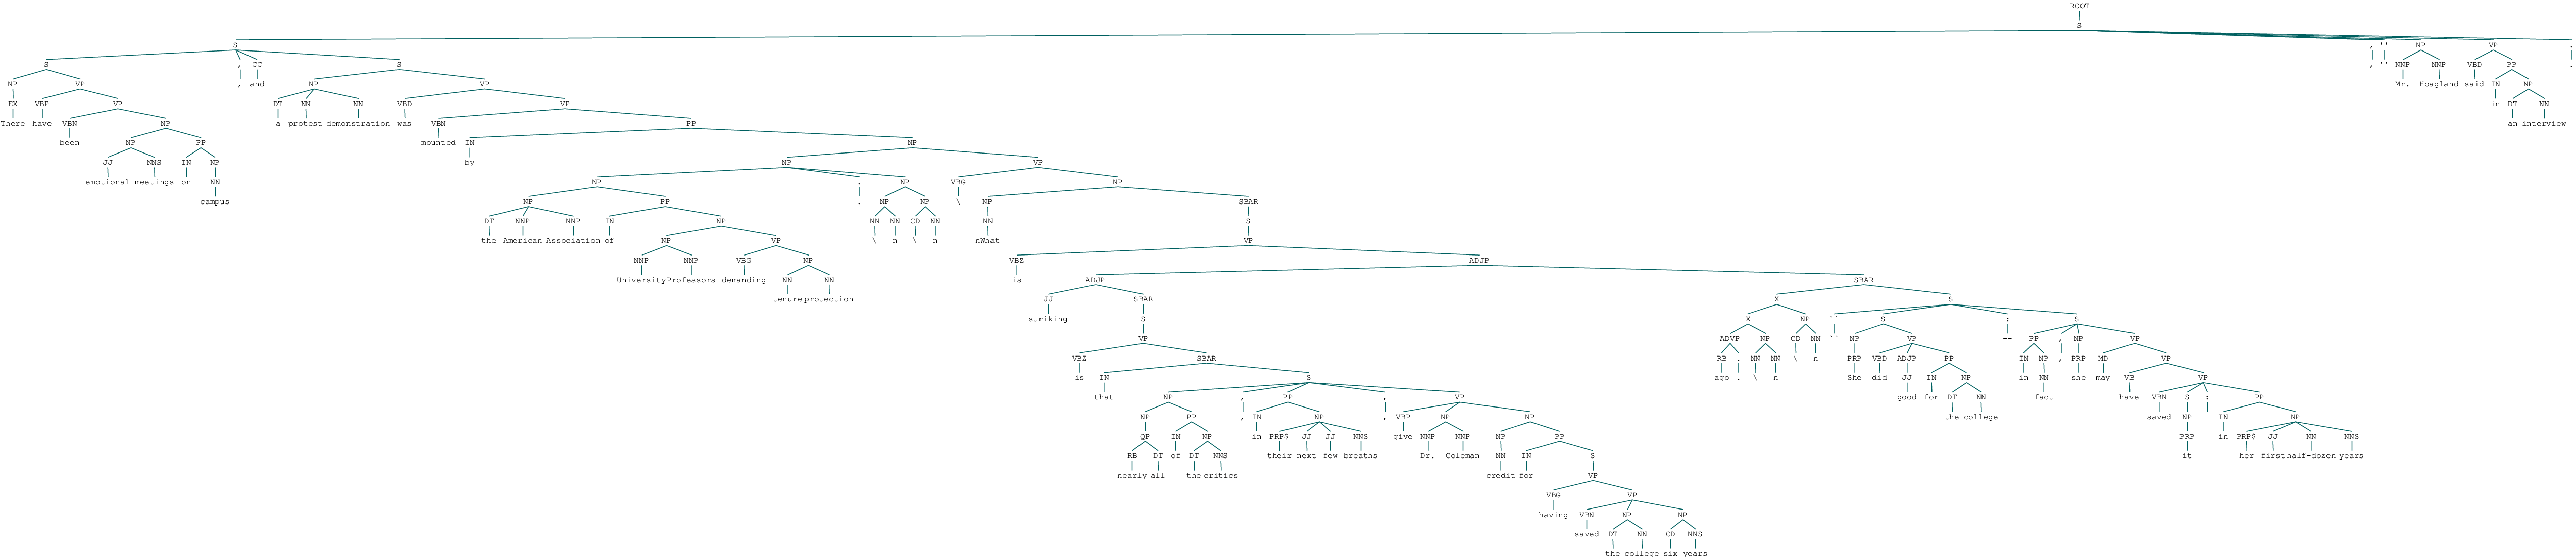

"Text = There have been emotional meetings on campus, and a protest demonstration was mounted by the American Association of University Professors demanding tenure protection.\\n\\n\\nWhat is striking is that nearly all of the critics, in their next few breaths, give Dr. Coleman credit for having saved the college six years ago.\\n\\n''She did good for the college -- in fact, she may have saved it -- in her first half-dozen years,'' Mr. Hoagland said in an interview."

'Code = 141'

'AID = 23738500'

In [123]:
parsed_output(accent2_subset_only_141, 34)

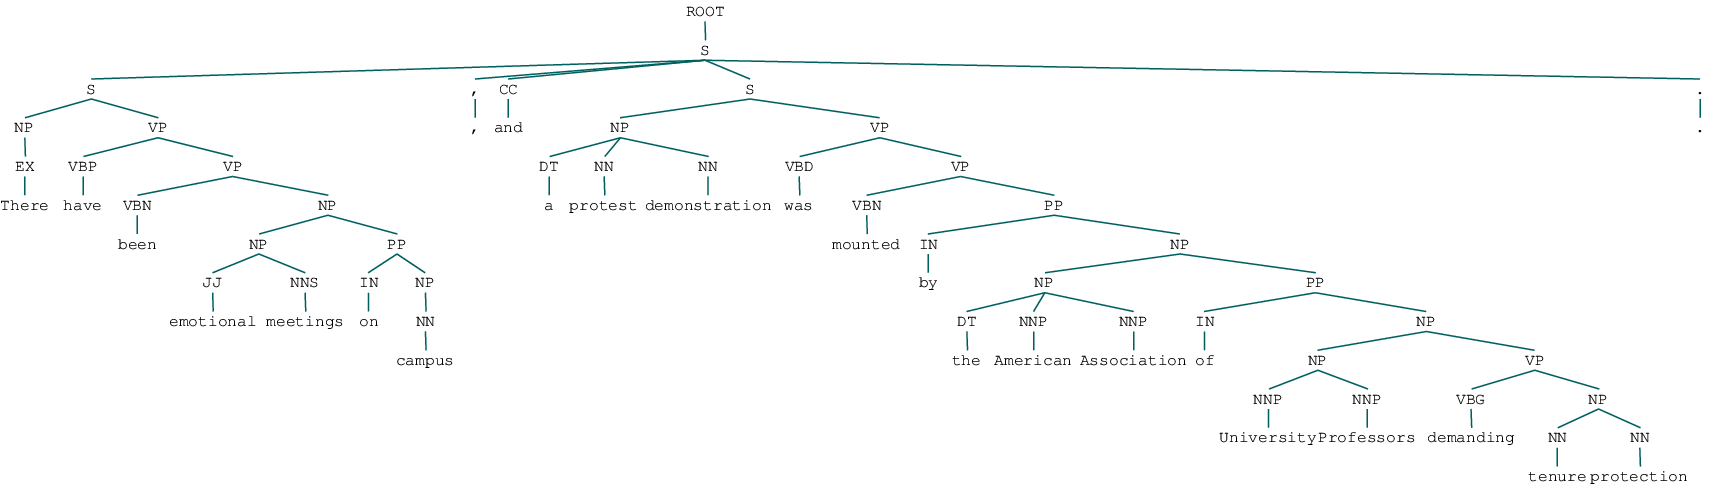

In [124]:
one_sentence_parser('There have been emotional meetings on campus, and a protest demonstration was mounted by the American Association of University Professors demanding tenure protection.')

### Break down by Event Code- Same Code, Same Text

In [84]:
# create subsets of parsed data on event code 141
accent2_subset_same_code_141 = accent2_subset_same_code[accent2_subset_same_code.code == 141].sort_values('aid').reset_index(drop = True)
petrarch2_subset_same_code_141 = petrarch2_subset_same_code[petrarch2_subset_same_code.code == 141].sort_values('aid').reset_index(drop = True)

# create subset of parsed data on event code 145
accent2_subset_same_code_145 = accent2_subset_same_code[accent2_subset_same_code.code == 145].sort_values('aid').reset_index(drop = True)
petrarch2_subset_same_code_145 = petrarch2_subset_same_code[petrarch2_subset_same_code.code == 145].sort_values('aid').reset_index(drop = True)

# create subset of parsed data on event code 181
accent2_subset_same_code_181 = accent2_subset_same_code[accent2_subset_same_code.code == 181].sort_values('aid').reset_index(drop = True)
petrarch2_subset_same_code_181 = petrarch2_subset_same_code[petrarch2_subset_same_code.code == 181].sort_values('aid').reset_index(drop = True)

# create subset of parsed data on event code 1831
accent2_subset_same_code_1831 = accent2_subset_same_code[accent2_subset_same_code.code == 1831].sort_values('aid').reset_index(drop = True)
petrarch2_subset_same_code_1831 = petrarch2_subset_same_code[petrarch2_subset_same_code.code == 1831].sort_values('aid').reset_index(drop = True)

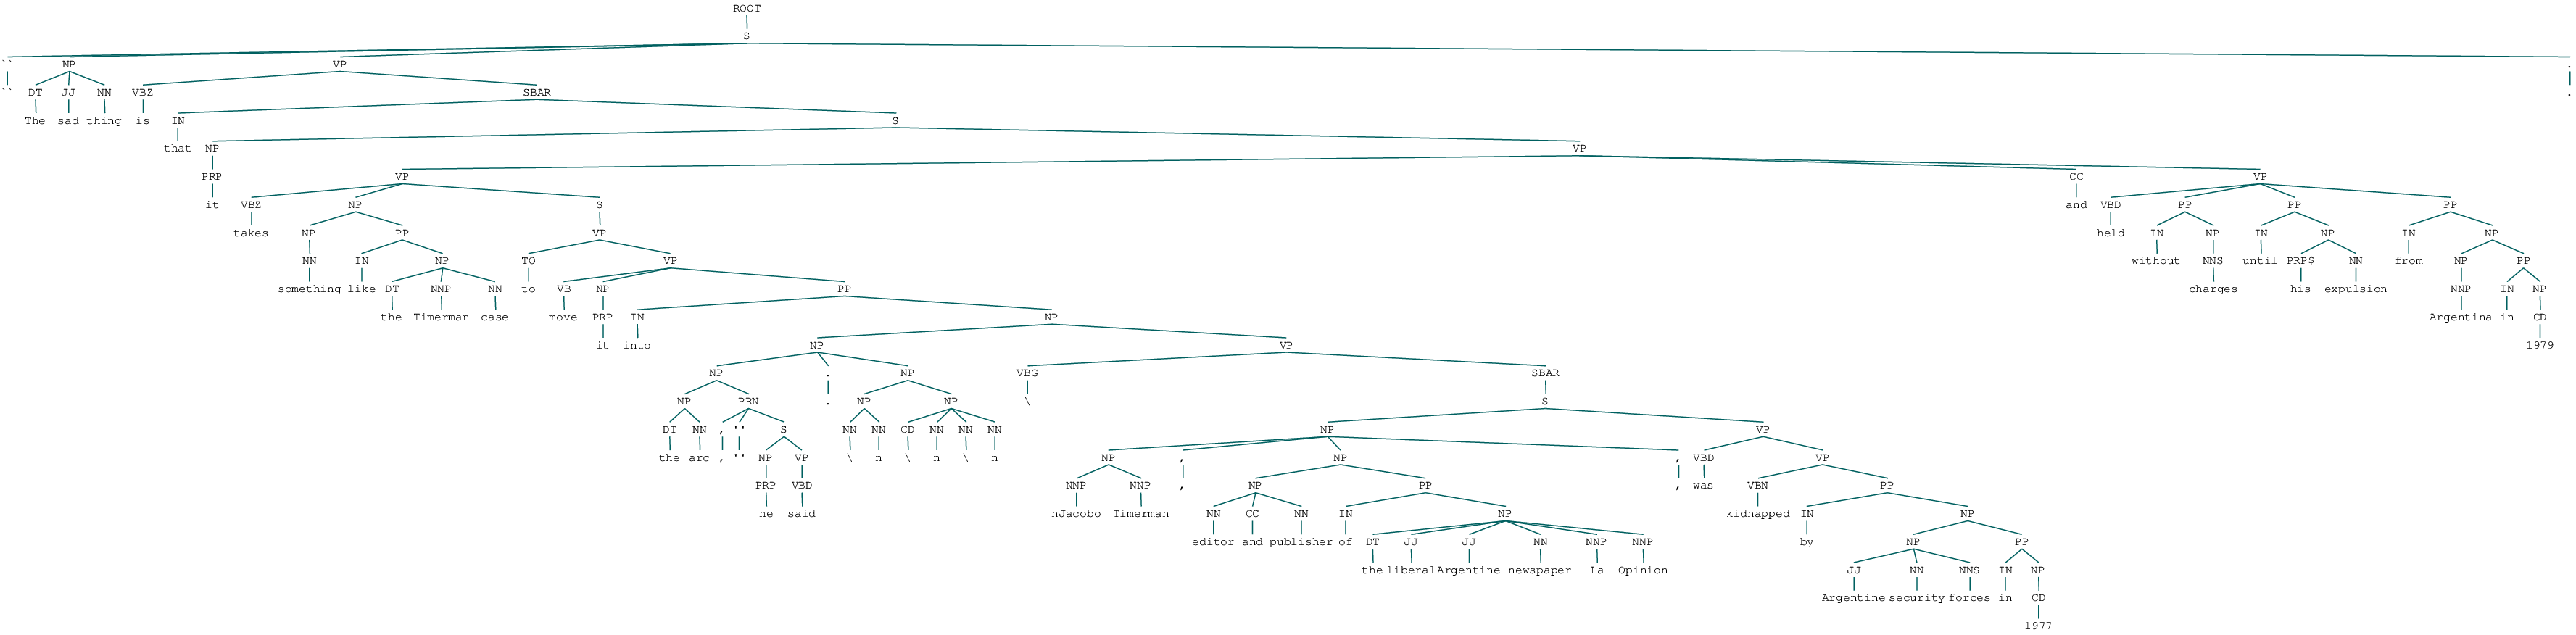

"Text = ''The sad thing is that it takes something like the Timerman case to move it into the arc,'' he said.\\n\\n\\n\\nJacobo Timerman, editor and publisher of the liberal Argentine newspaper La Opinion, was kidnapped by Argentine security forces in 1977 and held without charges until his expulsion from Argentina in 1979."

'Code = 181'

'AID = 22544080'

In [104]:
parsed_output(accent2_subset_same_code_181, 0)

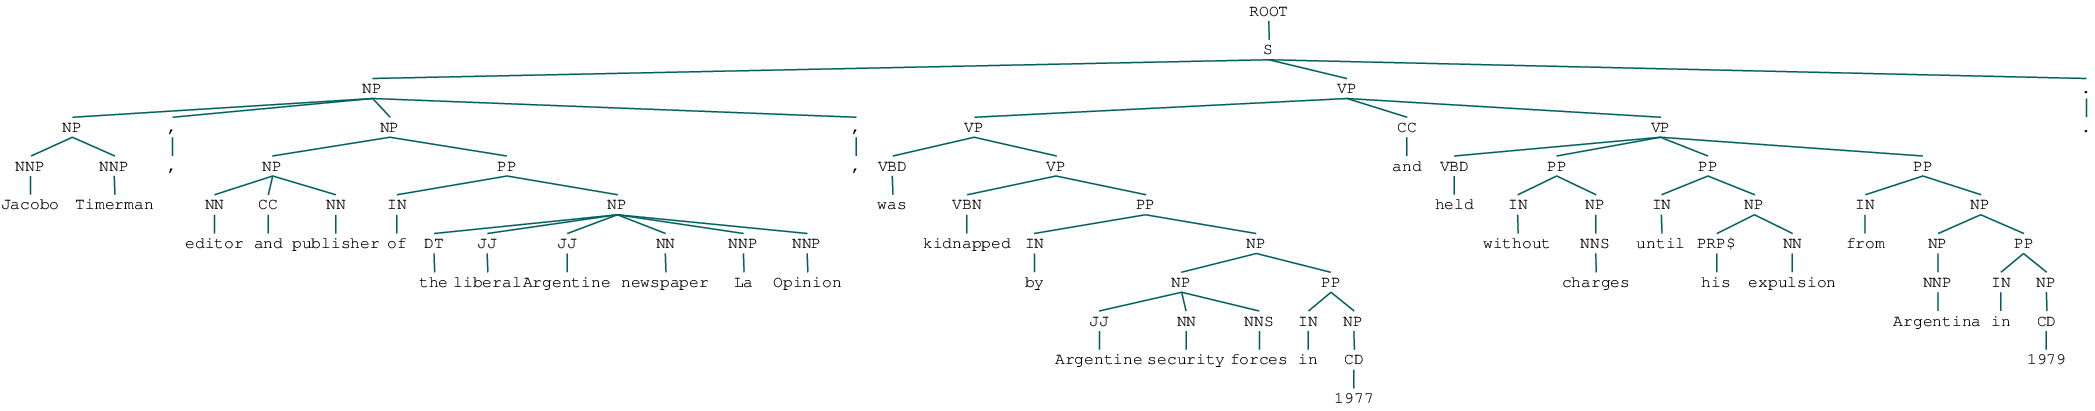

'Text = Jacobo Timerman , editor and publisher of the liberal Argentine newspaper La Opinion , was kidnapped by Argentine security forces in 1977 and held without charges until his expulsion from Argentina in 1979 .'

'Code = 181'

'AID = 22544080'

In [103]:
parsed_output(petrarch2_subset_same_code_181, 0)

## Identify Difference in Petrarch Data Run 2 (02 March 2020)

In [93]:
# Import Data from the second run on Batch 2
petrarch2_run2 = pd.read_csv("/Volumes/PartTime/Jonathan Bonaguro - Spring 2020/NYTbd sample 2 14 18/Run 2/combined_output.txt", sep = "\t")
petrarch2_run2.drop('Unnamed: 0', axis=1, inplace=True)

In [15]:
# trim to root code 18
petrarch2_run2_root18 = petrarch2_run2[petrarch2_run2.root_code == 18] 

In [77]:
# find the (one) instance that the dictionary improvement from the first run made
second_run_capture = petrarch2_run2_root18[~petrarch2_run2_root18.story_date.isin(petrarch2_root18.story_date)]

In [78]:
# parse the new findings
%time second_run_capture['parsed'] = core_parser(second_run_capture, 'text')
second_run_capture['dep'] = dep_parser(second_run_capture, 'text')

CPU times: user 53.9 ms, sys: 108 ms, total: 161 ms
Wall time: 265 ms


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


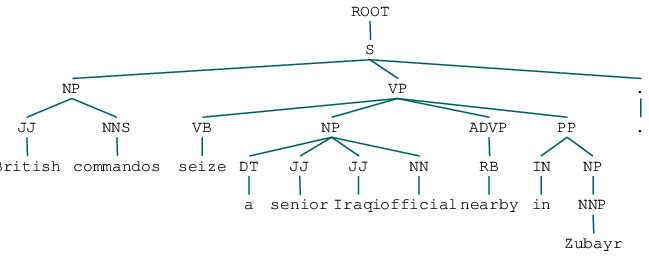

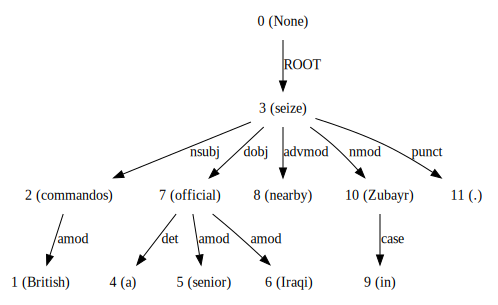

'Text = British commandos seize a senior Iraqi official nearby in Zubayr .'

'Code = 181'

In [79]:
easy_read(second_run_capture, 0)